In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
#Load data

In [2]:
deliveries = pd.read_csv("../data/deliveries_clean.csv")
matches = pd.read_csv("../data/matches_clean.csv")

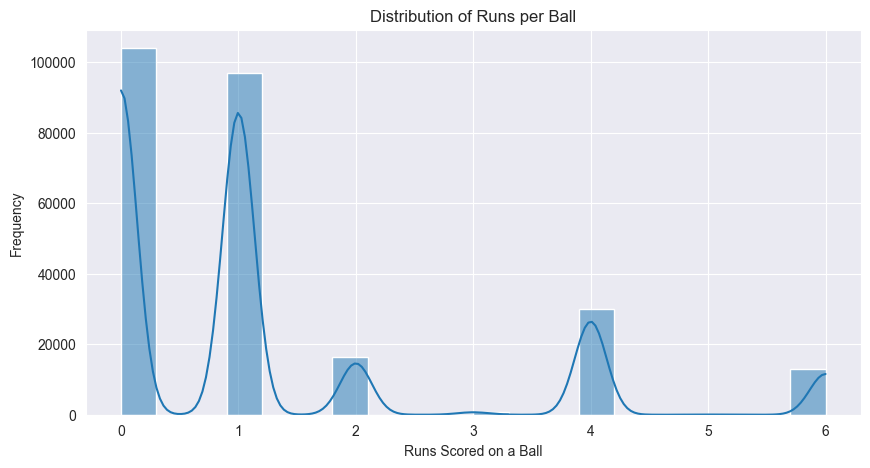

In [3]:
# Runs Distribution
plt.figure(figsize=(10,5))
sns.histplot(deliveries["batsman_runs"], bins=20, kde=True)
plt.title("Distribution of Runs per Ball")
plt.xlabel("Runs Scored on a Ball")
plt.ylabel("Frequency")
plt.show()

In [4]:
#Total runs per match
match_runs = deliveries.groupby("match_id")["total_runs"].sum().reset_index()


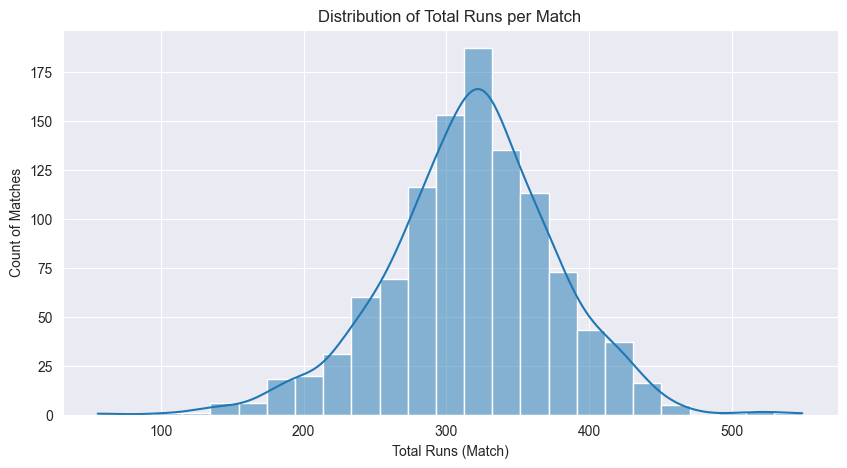

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(match_runs["total_runs"], bins=25, kde=True)
plt.title("Distribution of Total Runs per Match")
plt.xlabel("Total Runs (Match)")
plt.ylabel("Count of Matches")
plt.show()

In [10]:
#wicket Distribution
wickets = deliveries[deliveries["is_wicket"] == 1]


In [7]:
#Total wickets per match
match_wickets = wickets.groupby("match_id")["is_wicket"].sum().reset_index()


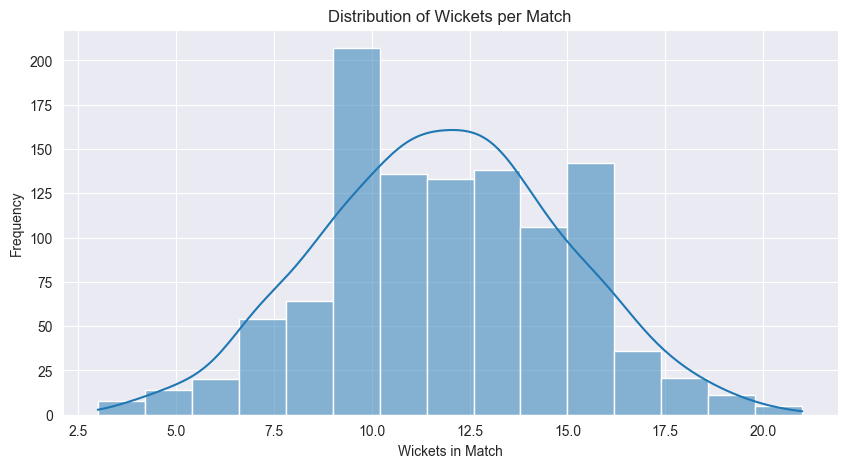

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(match_wickets["is_wicket"], bins=15, kde=True)
plt.title("Distribution of Wickets per Match")
plt.xlabel("Wickets in Match")
plt.ylabel("Frequency")
plt.show()

In [9]:
#venue Statistics
# Identify top scoring venues
venue_runs = matches.merge(
    deliveries.groupby("match_id")["total_runs"].sum().reset_index(),
    on="match_id",
    how="left"
)

KeyError: 'match_id'

In [ ]:
venue_avg = venue_runs.groupby("venue")["total_runs"].mean().sort_values(ascending=False).head(10)


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=venue_avg.values, y=venue_avg.index)
plt.title("Top 10 Highest Scoring Venues")
plt.xlabel("Average Runs per Match")
plt.ylabel("Venue")
plt.show()

In [ ]:
#Matches hosted per venue
venue_counts = matches["venue"].value_counts().head(10)


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=venue_counts.values, y=venue_counts.index)
plt.title("Top 10 Most Frequently Used Venues")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

In [ ]:
#Team performance
 #Teams total wins
team_wins = matches["winner"].value_counts()


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title("Total Wins by Team")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Team batting performance: average runs per match
team_runs = deliveries.groupby(["batting_team", "match_id"])["total_runs"].sum().reset_index()

team_avg_runs = team_runs.groupby("batting_team")["total_runs"].mean().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_avg_runs.index, y=team_avg_runs.values)
plt.title("Average Runs Scored per Match by Team")
plt.xlabel("Team")
plt.ylabel("Average Runs")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Team wicket-taking performance
team_wicket = deliveries[deliveries["is_wicket"] == 1].groupby("bowling_team")["is_wicket"].count()

team_wicket = team_wicket.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_wicket.index, y=team_wicket.values)
plt.title("Total Wickets Taken by Teams")
plt.xlabel("Team")
plt.ylabel("Total Wickets Taken")
plt.xticks(rotation=45)
plt.show()

In [ ]:
deliveries.columns